In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA

diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


0.7402597402597403


c:\Users\babab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


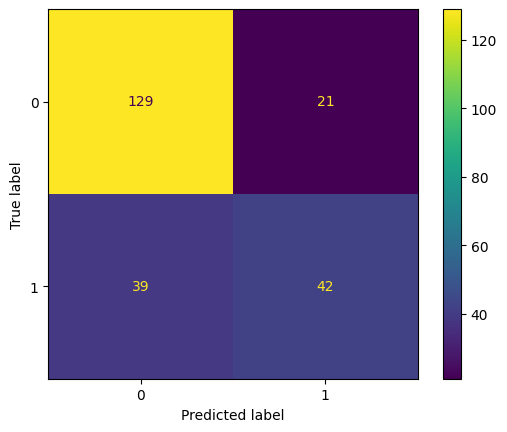

In [11]:
x = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
model = LogisticRegression(random_state=42).fit(x_train, y_train)
y_pred = model.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(model.score(x_test, y_test))

0.7575757575757576


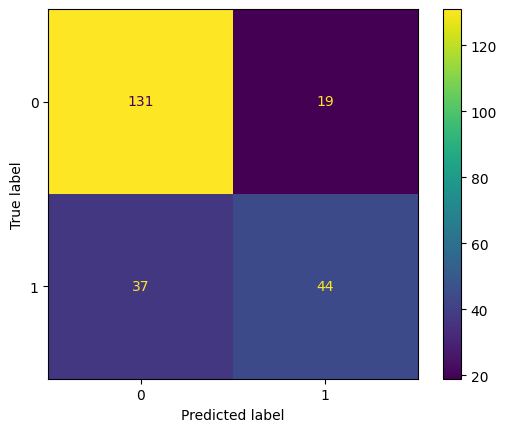

In [17]:
pca = PCA(n_components=6)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)
model = LogisticRegression(random_state=42).fit(x_train_pca, y_train)
print(model.score(x_test_pca, y_test))
ConfusionMatrixDisplay.from_estimator(model, x_test_pca, y_test)

The score of the model went up after performing PCA on it. I think this might be because PCA focuses on the variance and covariance and since the diabetes dataset is such a dense one.